<a href="https://colab.research.google.com/github/mouraxy/room/blob/main/modelos/Anemia%20Level%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Please upvote↑ if you find this helpful (suggestions are very welcome!)`
  
#### 1. Objective and description...
Implementation of a supervised multiclass classifier to identify possible correlations between different degrees of childhood anemia, in children aged 0 to 59 months. Data from the [Nigerian Demographic and Health Census](https://github.com/mouraxy/data/blob/main/raw/childrenAnemia.csv), 2018.
  
<br>

**_Keywords:_** missing data, duplicates, categorical encoding, correlation, feature selection, outliers, scaling, imbalanced classes, hyperparameter tuning, cross-validation, modeling.

<!--
Definition of each dataset attribute:

* **'mother_age'**: Mother's age in 5-year groups
* **'type_residence'**: Type of place of residence
* **'educational_level'**: Highest educational level
* **'social_class'**: Wealth index
* **'pregnancies'**: Births in the last five years
* **'pregnancy_age'**: Mother's age at pregnancy
* **'hemoglobin_level'**: Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)
* **'anemia_level'**: Child's level of anemia
* **'mosquito_net'**: Has a mosquito net for sleeping
* **'smokes'**: Smokes cigarettes
* **'marital_status'**: Current marital status
* **'residence_partner'**: Currently lives with husband/partner
* **'breastfeeding_time'**: When the child was breastfed
* **'fever'**: Has had a fever in the last two weeks
* **'hemoglobin_level2'**: Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
* **'level_anemia2'**: Child's level of anemia
* **'medication'**: Taking iron pills, [sprinkles](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC545194/) or syrup
-->

<br>

#### 2. Importing libraries...
Preparing the development environment. This is common practice when starting Python scripts and notebooks to ensure that all the necessary dependencies (features that other people have already written) are available.

In [ ]:
# import functions
!wget https://raw.githubusercontent.com/mouraxy/data/main/utils.py

In [6]:
# github functions
from utils import formatTable
from utils import genMetadata
from utils import showDuplicates
from utils import showTopValues

In [7]:
# tabular libraries
import pandas as pd

<br>

#### 3. Loading data...
The initial step in ML algorithms consists of importing data from external sources into programming environments. It's the first step to building a model.

In [8]:
# connects to the database
url = 'https://raw.githubusercontent.com/mouraxy/data/main/raw/childrenAnemia.csv'

# changes the column names
columns = [
    'mother_age',
    'type_residence',
    'educational_level',
    'social_class',
    'pregnancies',
    'pregnancy_age',
    'hemoglobin_level',
    'anemia_level',
    'mosquito_net',
    'smokes',
    'marital_status',
    'residence_partner',
    'breastfeeding_time',
    'fever',
    'hemoglobin_level2',
    'level_anemia2',
    'medication'
]

# read the database
raw_data = pd.read_csv(
    url,
    delimiter=',',
    header=0,
    names=columns,
    encoding='latin-1'
)

<br>

#### 4. Exploratory analysis...
From here, i will try to understand the object of study. So, let's explore the characteristics of our data!

In [9]:
print(formatTable(genMetadata(raw_data)))

┌────────────────────┬──────────────┬─────────┬───────────┬───────────┬────────┐
│ Variable           │ Data Types   │ Nulls   │ Minimum   │ Maximum   │ Mean   │
├────────────────────┼──────────────┼─────────┼───────────┼───────────┼────────┤
│ mother_age         │ object       │ 0       │ nan       │ nan       │ nan    │
│ type_residence     │ object       │ 0       │ nan       │ nan       │ nan    │
│ educational_level  │ object       │ 0       │ nan       │ nan       │ nan    │
│ social_class       │ object       │ 0       │ nan       │ nan       │ nan    │
│ pregnancies        │ int64        │ 0       │ 1.00      │ 6.00      │ 1.82   │
│ pregnancy_age      │ int64        │ 0       │ 12.00     │ 48.00     │ 19.57  │
│ hemoglobin_level   │ float64      │ 20788   │ 20.00     │ 218.00    │ 114.37 │
│ anemia_level       │ object       │ 20788   │ nan       │ nan       │ nan    │
│ mosquito_net       │ object       │ 0       │ nan       │ nan       │ nan    │
│ smokes             │ objec

<br>

#### 4.1 Duplicates...

Duplicate data affects the integrity of the data, compromising its accuracy and requiring a large storage allocation.

(4678, 0.13789647447234996)

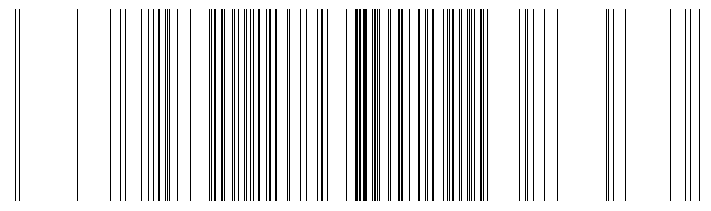

In [10]:
showDuplicates(raw_data)

<br>

#### 4.2 Distribution of data...

The distribution of the data in each variable identifies
which variables may be relevant. With this approach it will not be necessary to write extensive lines of code with visualization libraries.

In [13]:
print(formatTable(showTopValues(raw_data)))

┌────────────────────┬─────────────────┬─────────────────────┬──────────┐
│ Var                │ Top1            │ Top2                │ Others   │
├────────────────────┼─────────────────┼─────────────────────┼──────────┤
│ mother_age         │ 25-29           │ 30-34               │ +5       │
│ type_residence     │ Rural           │ Urban               │ +0       │
│ educational_level  │ No education    │ Secondary           │ +2       │
│ social_class       │ Poorest         │ Poorer              │ +3       │
│ pregnancies        │ 2               │ 1                   │ +4       │
│ pregnancy_age      │ 17              │ 16                  │ +32      │
│ hemoglobin_level   │ 113.0           │ 116.0               │ +121     │
│ anemia_level       │ Not anemic      │ Moderate            │ +2       │
│ mosquito_net       │ Yes             │ No                  │ +0       │
│ smokes             │ No              │ Yes                 │ +0       │
│ marital_status     │ Married        

<br>

#### 4.2.1 Target variable...
The target variable is what we should predict in a statistical or machine learning model. In other words, anticipating your results is the goal!

In [14]:
target = 'anemia_level'